# Lab 6

In [2]:
# import library
import pickle
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import statistics
import math
import random
import decimal

### Setup
LHC background faking. Poisson with mean of 100.

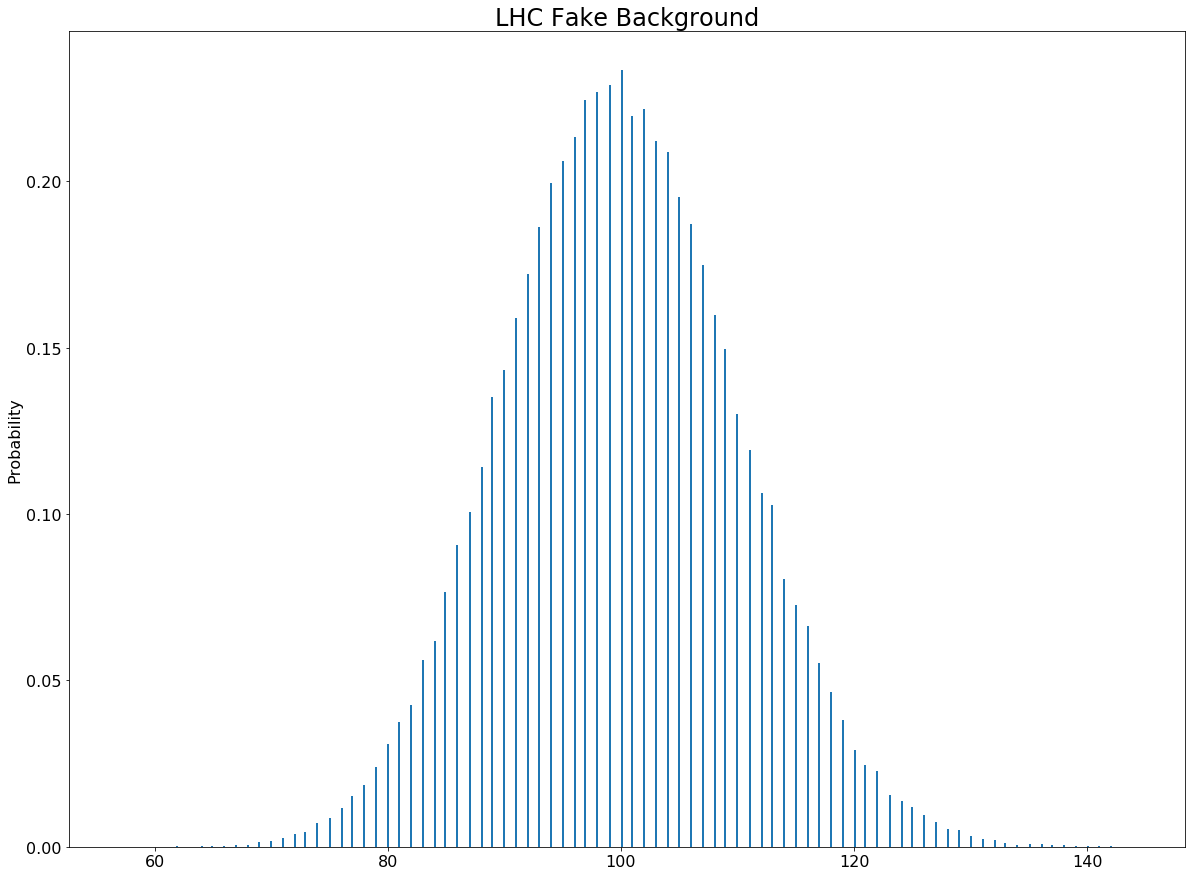

In [3]:
plt.rcParams["figure.figsize"] = (20,15)

mu = 100
poisson_lhc = stats.poisson.rvs(mu, size = 100000)
plt.tick_params(labelsize = 16)
plt.hist(poisson_lhc, 500, density=True)
plt.title("LHC Fake Background",fontsize=24)
plt.ylabel('Probability', fontsize = 16)
plt.show()

### Problem 1

Find the 5 sigma sensitivity threshold.

The probability of a 5-sigma event for a standard normal distribution is 0.9999997133484281.
The value associated to a 5-sigma event for a poisson distribution with a mean around 100 is 154.0.
The 5-sigma sensitivity threshold for our fake background is 154.

In [4]:
p = stats.norm.cdf(5) #probability of 5 sigma
s = stats.poisson.ppf(p, mu) #value associated to a 5 sigma sensitivity threshold
print("Probability of 5-sigma for a standard normal distribution: ", p)
print("Value associated to 5-sigma for a poisson distribution: ", s)

Probability of 5-sigma for a standard normal distribution:  0.9999997133484281
Value associated to 5-sigma for a poisson distribution:  154.0


### Problem 2

Inject a single signal multiple times into your background, between the range of 8-30 sigma.

I will inject the signal at 8 sigma 5 percent of the time into our poisson background.

#### a)
Histogram how bright the signal is and  discuss its shape.

This background histogram is poisson distributed around a mean of 100. The signal injection at 8 sigma was taken at a probability of 1/20, at random points in our poisson array. This will cause the signal injected histogram around 8 sigma to also follow a poisson pattern with a longer tail. This trend is hard to observe because our histograms look gaussian because of the central limit theorem - we have a large sample size of 100 thousand points.

Injection value:  190.0


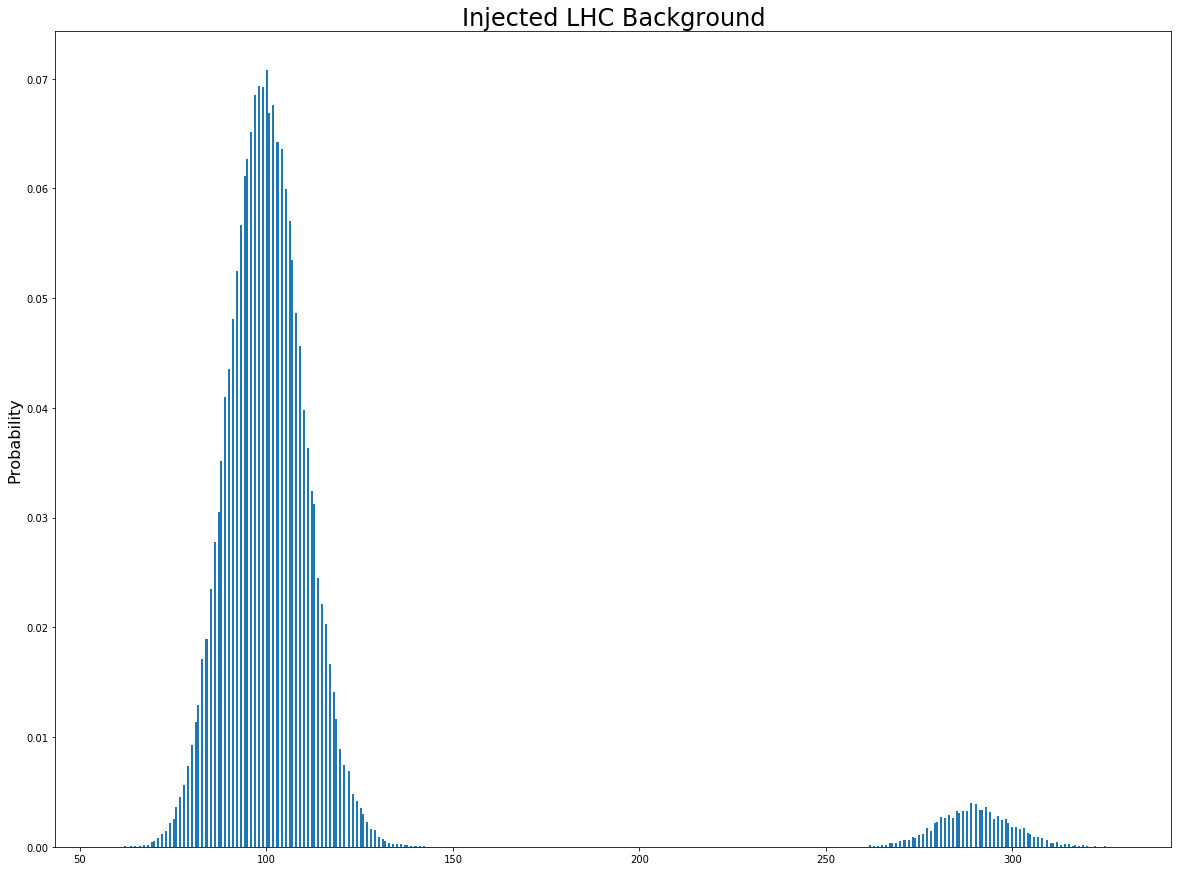

In [5]:
p = stats.norm.cdf(8) #probability of 8 sigma
injection_value = stats.poisson.ppf(p, mu) #value associated to 8 sigma to be injected
print("Injection value: ", injection_value)

size = 100000
injection = [0] * size
for i in range(100000):
    val = random.randint(1,21)
    if val == 1:
        #occurs 1/20 times
        injection[i] = poisson_lhc[i] + (injection_value)
    else:
        injection[i] = poisson_lhc[i]

plt.rcParams["figure.figsize"] = (20,15)
plt.hist(injection, 500, density=True)
plt.title("Injected LHC Background",fontsize=24)
plt.ylabel('Probability', fontsize = 16)
plt.show()

#### b)
Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

In this case our signal is biased because the injection signal for 8 sigma is 190, but because our background distribution is centered around a mean of 100, the signal is shifted to be around a mean of 290. Therefore the observed value is more likely to be stronger than the true injected signal. Taking random values from a poisson background causes our signal to also have noise that mimics the poisson distribution. But because of our large sample size(100 thousand), and the central limit theorem, or signal ends up looking really gaussian. At a smaller sample size I would say that the signal is not symmetric, but because I have a large sample size, the central limit theorem causes my signal to look symmetric. 

### Problem 3
Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5LaTeX: \sigmaσ (30LaTeX: \sigmaσ or more). 

For the suite of injected signals I am going to use a probability of injection 1/20, and only use approximations of what 20+ sigma. This is because trying to calculate what probability a sigma greater than 8 is using cdf causes the probability value to overflow from 0.99999... to 1. This gives us a  value of infinity. Which obviously causes issues when trying to inject. Therefore, I will be using random injections from the background mean of 100 to 300.

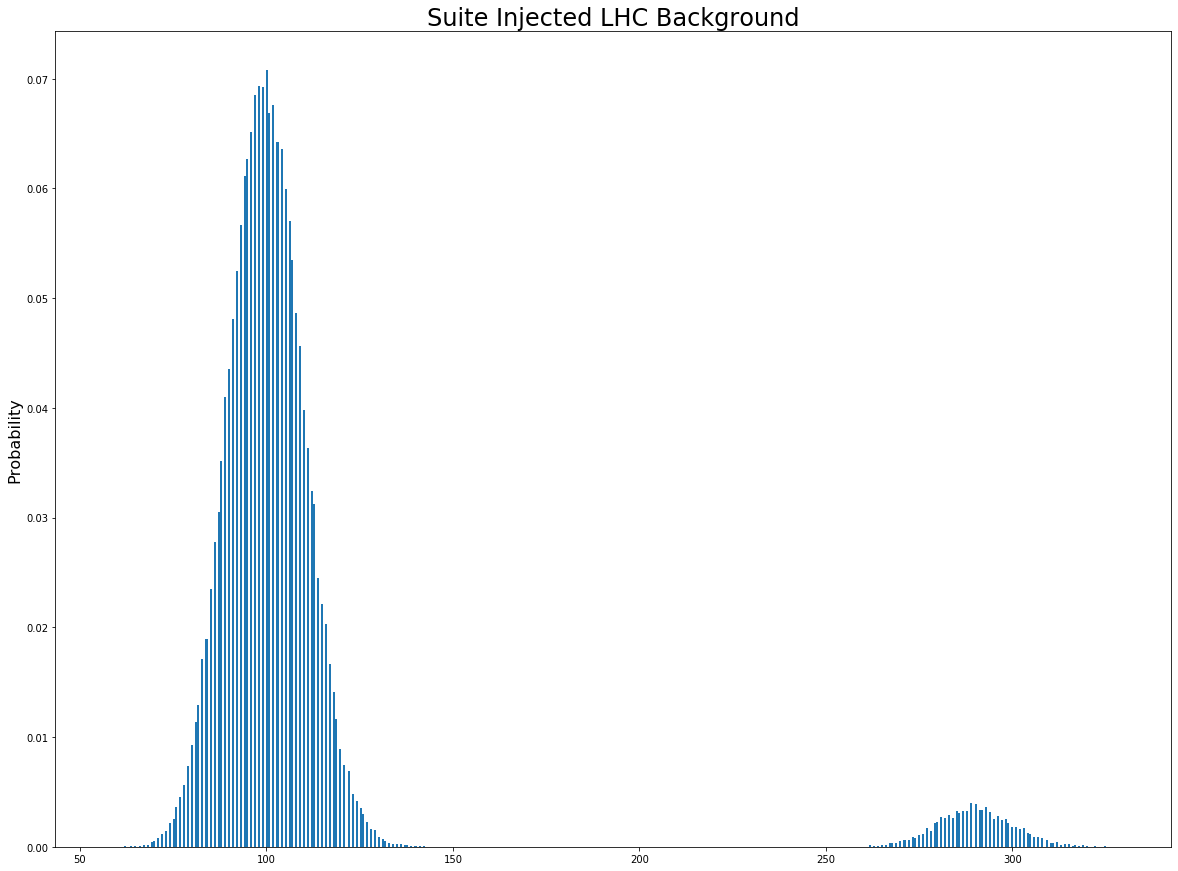

In [6]:
size = 100000
suite_injection = [0] * size
for i in range(100000):
    val = random.randint(1,21)
    if val == 1:
        #occurs 1/20 times
        injection_value = float(decimal.Decimal(random.randrange(100, 1000))/100)
        suite_injection[i] = poisson_lhc[i] + (injection_value)
    else:
        suite_injection[i] = poisson_lhc[i]

plt.hist(injection, 500, density=True)
plt.title("Suite Injected LHC Background",fontsize=24)
plt.ylabel('Probability', fontsize = 16)
plt.show()

#### a)
Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed signal

The plotted histogram shows the relationship for the probability of occurrence of any injected signal given an observed signal. The strongest relationship can be observed right along the diagonal for an injected signal to show up. Taking and analyzing a sample point it seems that the offset between the injected signal and the observed signal is 100. Which is the value of the mean of our poisson background distribution.

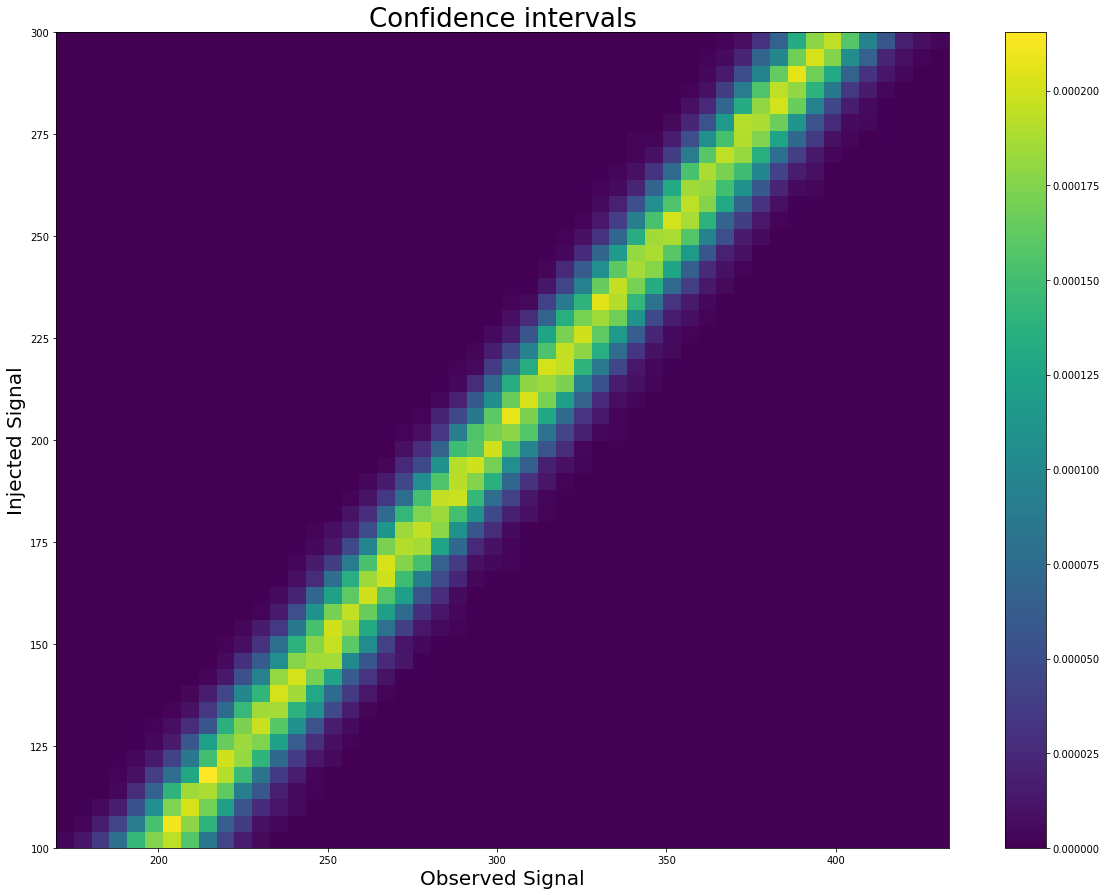

In [16]:
noise = stats.poisson.rvs(mu=100, size=100000)
injection = np.linspace(100,300,100000)

observed = noise + injection

h = plt.hist2d(observed, injection, bins = (50,50), density=True)
plt.colorbar(h[3])
plt.ylabel("Injected Signal", fontsize = "20")
plt.xlabel("Observed Signal", fontsize = "20")
plt.title("Confidence intervals", fontsize = "26")
plt.show()

#### b)
If you choose the same injected signal power as in problem 2, show that you get the same answer.

By selecting an injection value of 190 along the y-axis for the injected signal. If we were to follow it to the yellow diagonal where the probabiity of observation is the highest we can see that this corresponds to an x-value(observed signal) of approximately 290. Which is roughly what we demonstrted in problem two. Injecting a value of 190 into a poisson background around a mean of 100, gave us an observed value around 290.

#### c)
Now reverse the problem, select an observed signal (pick something quite a bit stronger than 5σ and create a 1D histogram of the injected signal pdf(). Describe the meaning of this histogram.

Since we are reversing the problem, the process also needs to be reversed. In this case I found the injected value that corresponds to an observed signal of 300, by subtracting the noise of a 100k poisson background around a mean of 100. This one dimensional histogram shows us the probability distribution of a slice of the 2d histogram at the x-value 300 for the observed signal. As we can see here the probability has a mean around 200 for the injected signal, which corresponds to our 2d histogram.

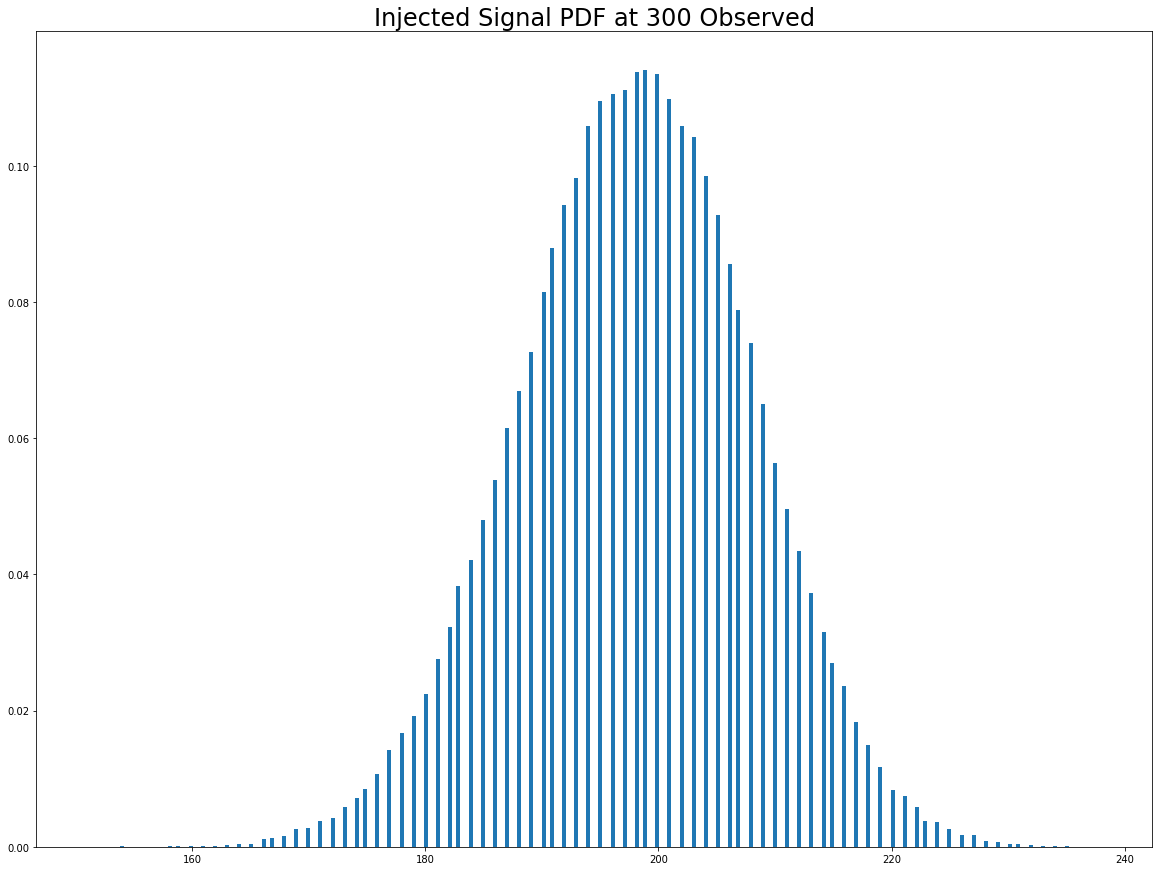

In [26]:
observed_signal = 300 
noise = stats.poisson.rvs(mu=100, size=100000)
observed = np.ones(100000)*obs_sig
injection = observed - noise

h = plt.hist(injection, bins=250, density=True)
plt.title('Injected Signal PDF at 300 Observed', fontsize = 24)
plt.show()

#### d)
For your observed signal, what is the 1σ uncertainty on the true signal strength?

The one sigma uncertainty on the true signal strength is approximated between 187.9 and 207.9.

In [27]:
mean = injection.mean()
std = injection.std()
upper_bound = stats.norm.isf(stats.norm.sf(1), loc=mean, scale=std)
lower_bound = stats.norm.isf(stats.norm.cdf(1), loc=mean, scale=std)

print(lower_bound)
print(upper_bound)

187.954144395438
207.97967560456203


#### e) 
Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

Since our injection signal is normal or symmetric, distribution creates a gaussian model for the injected signal. It is also biased - the bias is the noise that we are taking away from the observed signal.

### Problem 4

#### a)
Repeat problem 3c, calculating the injected signal pdf(). One of the differences you should immediately see is that the pdf() extends to zero.

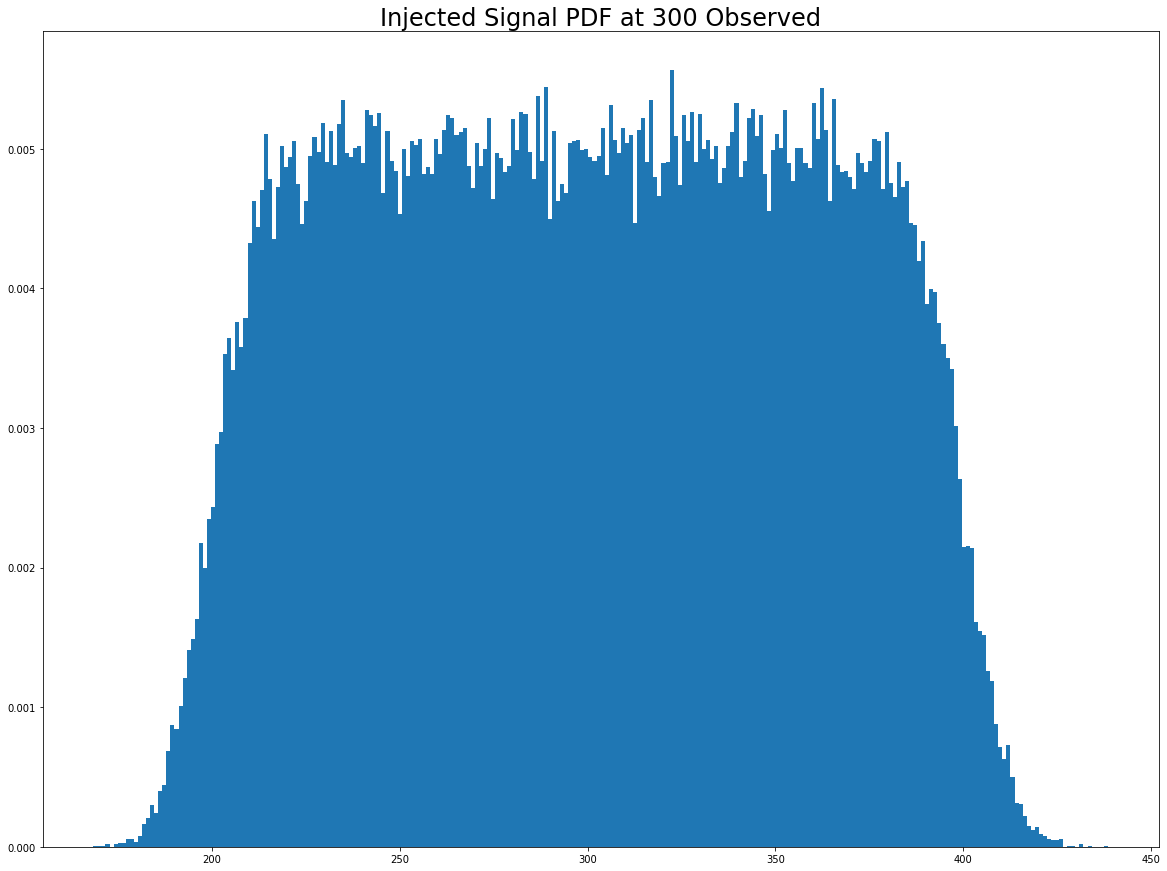

In [33]:
observed_signal = 300 

noise = stats.poisson.rvs(mu=100, size=100000)
injection = np.linspace(100,300,100000)
observed = np.ones(100000)*obs_sig
observed = noise + injection



h = plt.hist(observed, bins=250, density=True)
plt.title('Injected Signal PDF at 300 Observed', fontsize = 24)
plt.show()


#### b)
Describe what it means to have the true signal pdf() extend to zero.

#### c)
Calculate a 95% confidence upper bound. [Hints: make sure your pdf() is normalized. The statistical question is:  if I observe this candidate signal (and it is too weak to claim a detection), then the true signal would be less than X 95% of the time.]